In [ ]:
import os, sys  
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dev_name = 'Examples'
pg_path = '/content/drive/MyDrive/CodeData/[Packages]/'+dev_name

sys.path.append(pg_path)

In [ ]:
#!pip install mne

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from scipy import signal
import mne
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
n_channels = 16
sampling_freq = 125  # in Hertz
ch_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'F3', 'F4', 'P3', 'P4']
ch_types = ['eeg'] * n_channels
all_ch_names = ch_names + ['Task','STM']
all_ch_types = ch_types + ['misc','misc']
p_detrend = 1 # 0: OFF, 1: On
p_normalization = 1 # 0: do not, 1: [0, 1] scaling, 2: standardization (x-mean)/var
p_ica_flag = 1
p_ts_psd_flag = 0

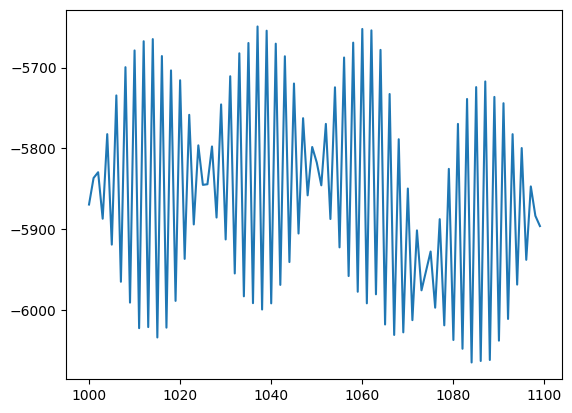

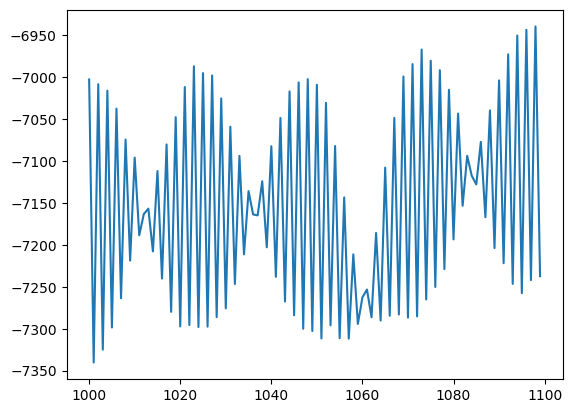

In [ ]:
## Temporay Test Code - Siganal Quality
filenames=[(f'/content/drive/MyDrive/CodeData/Code/GitHub_Examples/EEG_MNE_Demo2_S1.csv'),
           (f'/content/drive/MyDrive/CodeData/Code/GitHub_Examples/EEG_MNE_Demo2_S2.csv')]

for i in range(0,len(filenames)):

  # csv load and edit
  temp_pd = pd.read_csv(filenames[i])
  temp_pd=temp_pd.drop(columns=['Unnamed: 0'])
  temp_pd=temp_pd.T
  temp_pd=temp_pd.drop(columns=[0,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
  temp_pd=temp_pd.drop(temp_pd.index[0:sampling_freq*5],axis=0) # remove first 5sec data
  temp_pd=temp_pd.reset_index(drop=True)
  temp_pd.columns = ch_names

  plt.figure()
  plt.plot(temp_pd['Fp1'][1000:1100])

<Figure size 640x480 with 0 Axes>

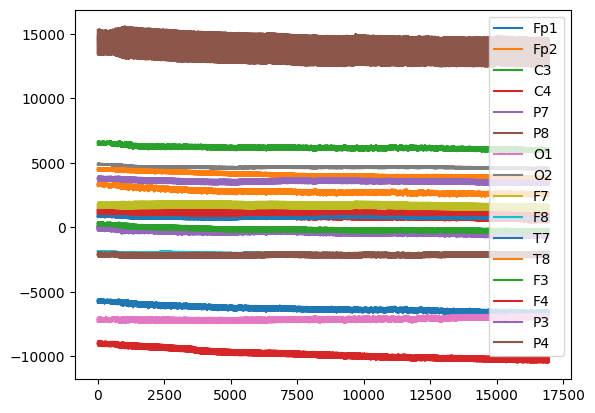

<Figure size 640x480 with 0 Axes>

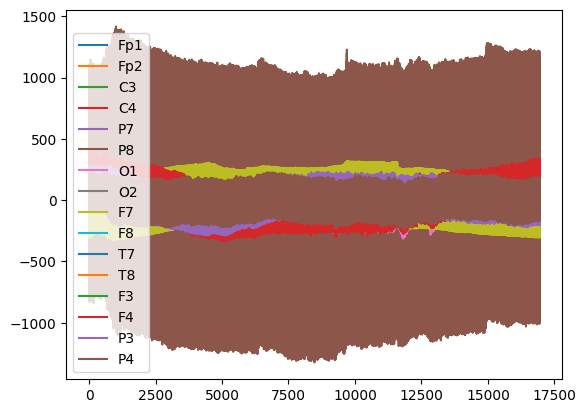

<Figure size 640x480 with 0 Axes>

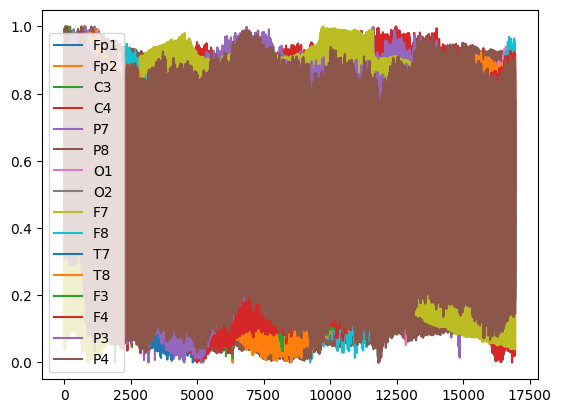

In [ ]:
filenames=[(f'/content/drive/MyDrive/CodeData/GitHub_Examples/EEG_MNE_Demo2_S1.csv'),
           (f'/content/drive/MyDrive/CodeData/GitHub_Examples/EEG_MNE_Demo2_S2.csv')]

eeg_raw={}

for i in range(0,len(filenames)):

  # csv load and edit
  temp_pd = pd.read_csv(filenames[i])
  temp_pd=temp_pd.drop(columns=['Unnamed: 0'])
  temp_pd=temp_pd.T
  temp_pd=temp_pd.drop(columns=[0,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
  temp_pd=temp_pd.drop(temp_pd.index[0:sampling_freq*5],axis=0) # remove first 5sec data
  temp_pd=temp_pd.reset_index(drop=True)
  temp_pd.columns = ch_names

  # Temporary plot
  if(i==0):
    plt.figure()
    temp_pd.plot() # or plt.plot(temp_pd)

  ## Detrend
  def detrend_df(df):
    detrended_data = {col: signal.detrend(df[col]) for col in df.columns}
    detrended_df = pd.DataFrame(detrended_data)
    return detrended_df

  if p_detrend == 1:
    temp_pd = detrend_df(temp_pd)

  # Temporary plot
  if p_detrend == 1 and (i==0):
    plt.figure()
    temp_pd.plot() # or plt.plot(temp_pd)

  ## Normalization
  if p_normalization == 1:
    scaler = MinMaxScaler()
    temp_pd = pd.DataFrame(scaler.fit_transform(temp_pd), columns=temp_pd.columns)
  elif p_normalization == 2:
    scaler = StandardScaler()
    temp_pd = pd.DataFrame(scaler.fit_transform(temp_pd), columns=temp_pd.columns)

  # Temporary plot
  if (p_normalization == 1 or p_normalization == 2) and (i==0):
    plt.figure()
    temp_pd.plot() # or plt.plot(temp_pd)

  ## Temporary Task & STM marking by filenames 
  temp_pd['Task']=int(i)+1
  temp_pd['STM']=0
  for STM_i in range(0,temp_pd.shape[0],sampling_freq):
    temp_pd['STM'].iat[STM_i] = temp_pd['Task'].iat[STM_i]   
    
  ## channels X times
  temp_pd = temp_pd.transpose()

  ## collecting EEG raw
  eeg_raw[i]=temp_pd

In [ ]:
# Temporary Check
eeg_raw[0]

,0,1,2,3,4,5,6,7,8,9,...,16945,16946,16947,16948,16949,16950,16951,16952,16953,16954
Fp1,0.618490,0.960015,0.653934,0.936403,0.662440,0.889998,0.704572,0.846387,0.745259,0.804565,...,0.545943,0.566035,0.608858,0.510682,0.668226,0.453947,0.719996,0.406757,0.755880,0.353005
Fp2,0.625472,0.921183,0.649473,0.899446,0.662590,0.867270,0.701163,0.826648,0.727276,0.788852,...,0.545611,0.552288,0.604199,0.513540,0.654341,0.451031,0.699605,0.406721,0.730446,0.364821
C3,0.583661,0.955663,0.621956,0.938479,0.636842,0.893611,0.678652,0.846931,0.714048,0.793439,...,0.379879,0.417742,0.441220,0.351422,0.504881,0.288182,0.564157,0.237878,0.602162,0.182284
C4,0.920422,0.141729,0.917012,0.161247,0.872488,0.201917,0.818886,0.274037,0.742634,0.362339,...,0.599230,0.301237,0.499416,0.403742,0.392780,0.507667,0.290506,0.604770,0.191554,0.682876
P7,0.906186,0.390258,0.943125,0.367449,0.909948,0.390034,0.900164,0.415471,0.857881,0.460413,...,0.667989,0.420248,0.573054,0.529021,0.480646,0.628074,0.385679,0.718799,0.307269,0.763936
P8,0.880766,0.199117,0.853238,0.239087,0.798794,0.296391,0.729910,0.371812,0.646130,0.461136,...,0.614845,0.483235,0.507777,0.591720,0.401182,0.691758,0.303548,0.781995,0.222882,0.851620
O1,0.387212,0.873086,0.437212,0.830094,0.461311,0.768679,0.510581,0.716859,0.569045,0.661135,...,0.608063,0.648020,0.685242,0.584526,0.756693,0.490569,0.815924,0.439187,0.871433,0.366609
O2,0.821374,0.994600,0.859366,0.963081,0.861647,0.944062,0.898427,0.918666,0.913716,0.880070,...,0.336913,0.292426,0.374395,0.245411,0.417361,0.209812,0.454397,0.185372,0.483971,0.148370
F7,0.459419,0.311708,0.376472,0.398556,0.289251,0.481956,0.209752,0.557324,0.140561,0.621038,...,0.110995,0.713448,0.064938,0.749375,0.042014,0.761100,0.043086,0.748829,0.068084,0.713632
F8,0.770960,0.950660,0.747433,0.964218,0.725633,0.947962,0.719558,0.946613,0.726298,0.949536,...,0.619604,0.932279,0.631161,0.924295,0.680530,0.870683,0.721082,0.837067,0.776813,0.781637


<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, F8, T7, T8, F3, F4, P3, ...
 chs: 16 EEG, 2 misc
 custom_ref_applied: False
 description: OpenBCI
 dig: 19 items (3 Cardinal, 16 EEG)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 18
 projs: []
 sfreq: 125.0 Hz
>
Creating RawArray with float64 data, n_channels=18, n_times=16955
    Range : 0 ... 16954 =      0.000 ...   135.632 secs
Ready.
<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, F8, T7, T8, F3, F4, P3, ...
 chs: 16 EEG, 2 misc
 custom_ref_applied: False
 description: OpenBCI
 dig: 19 items (3 Cardinal, 16 EEG)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 18
 projs: []
 sfreq: 125.0 Hz
>
Creating RawArray with float64 data, n_channels=18, n_times=16742
    Range : 0 ... 16741 =      0.000 ...   133.928 secs
Ready.
Effective window size : 16.384 (s)


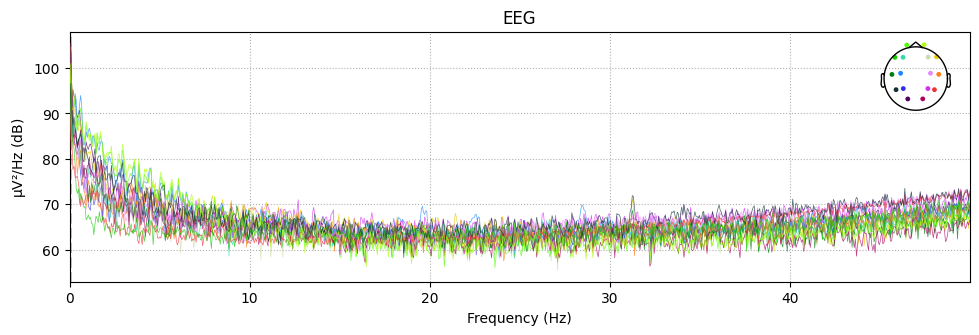

Done


In [ ]:
mne_raw={}
for i in range(0,len(filenames)):
    
    ## MNE object
    info = mne.create_info(n_channels, sfreq=sampling_freq)
    info = mne.create_info(all_ch_names, ch_types=all_ch_types, sfreq=sampling_freq)
    info.set_montage('standard_1020')

    info['description'] = 'OpenBCI'
    info['bads'] = []  # Names of bad channels
    #info['highpass'] = l_freqs
    #info['lowpass'] = h_freqs
    print(info)

    raw = mne.io.RawArray(eeg_raw[i], info)
    mne_raw[i] = raw
    
# data, times = mne_raw[1].get_data(picks=['Fp1'], return_times=True)
# plt.plot(times,data[0,:])
# mne_raw[1].plot(duration=10000,show_scrollbars=False, show_scalebars=False,scalings='auto')

# Temporary Plot PSD
mne_raw[0].plot_psd(fmax=50)
print('Done')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Filter length: 413 samples (3.304 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0

/content/drive/MyDrive/CodeData/[Packages]/Example/mne/filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,
/content/drive/MyDrive/CodeData/[Packages]/Example/mne/filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,
/content/drive/MyDrive/CodeData/[Packages]/Example/mne/filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,
/content/drive/MyDrive/CodeData/[Packages]/Example/mne/filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,
/content/drive/MyDrive/CodeData/[Packages]/Examp

Using matplotlib as 2D backend.
Opening raw-browser...


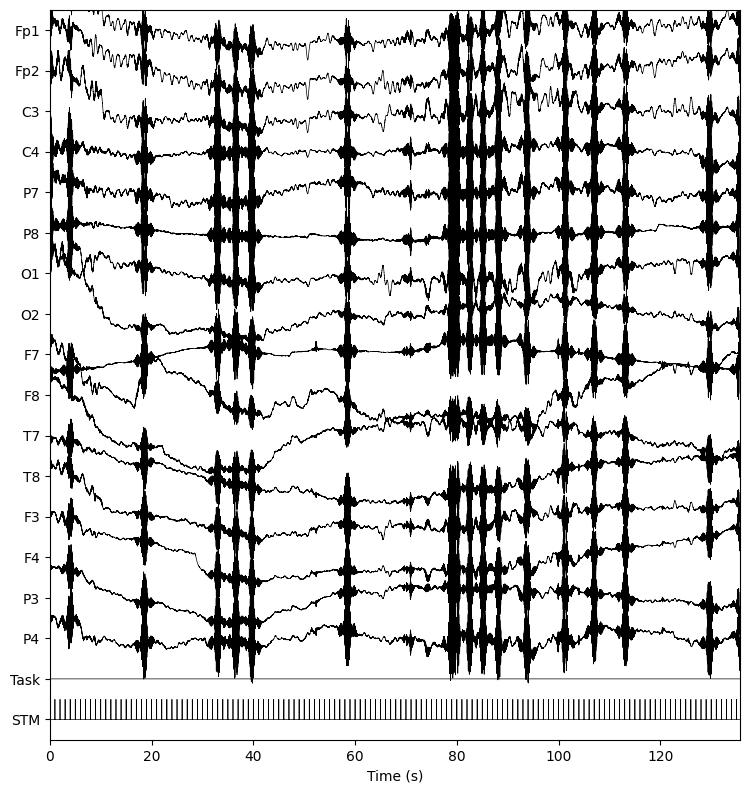

Effective window size : 16.384 (s)


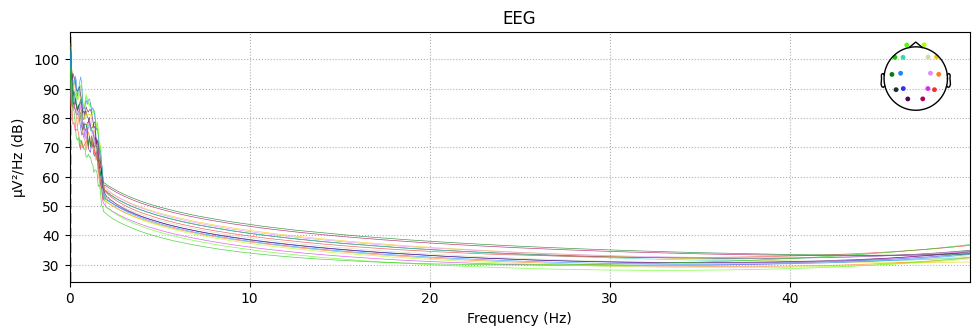

In [ ]:
## Filtering
mne_raw_filtered={}
for i in range(0,len(filenames)):
    data = mne_raw[i].copy()
    #data_lp_hp = data.filter(l_freq=raw.info['lowpass'],h_freq=raw.info['highpass'],picks='eeg', method='fir')
    data_lp_hp = data.filter(l_freq=60,h_freq=1,picks='eeg', method='fir')
    data_lp_hp_nt = data_lp_hp.copy().notch_filter(freqs=60, picks='eeg')
    mne_raw_filtered[i] = data_lp_hp_nt.copy()

mne_raw_filtered[0].plot(duration=10000,show_scrollbars=False, show_scalebars=False,scalings='auto')
mne_raw_filtered[0].plot_psd(fmax=50)
print('')

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-10-f8534260675f>:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(mne_raw_filtered[i])


Fitting ICA took 3.2s.


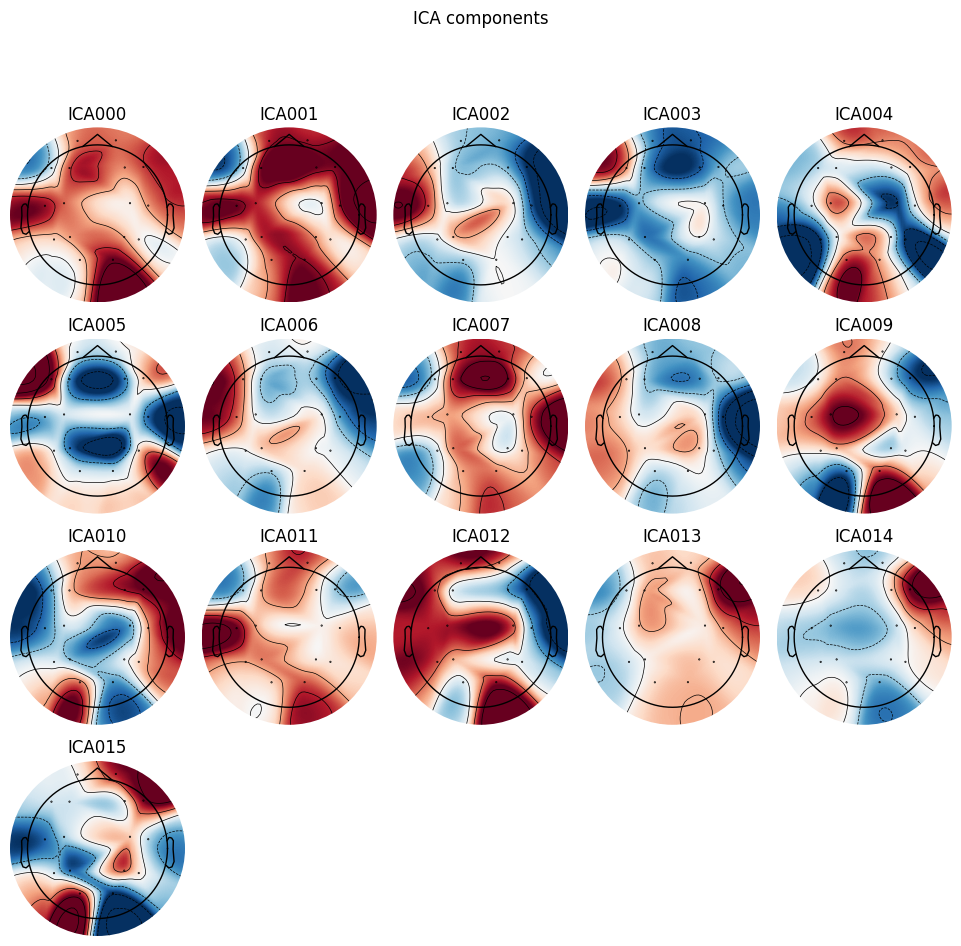

Creating RawArray with float64 data, n_channels=16, n_times=16955
    Range : 0 ... 16954 =      0.000 ...   135.632 secs
Ready.
Opening ica-browser...


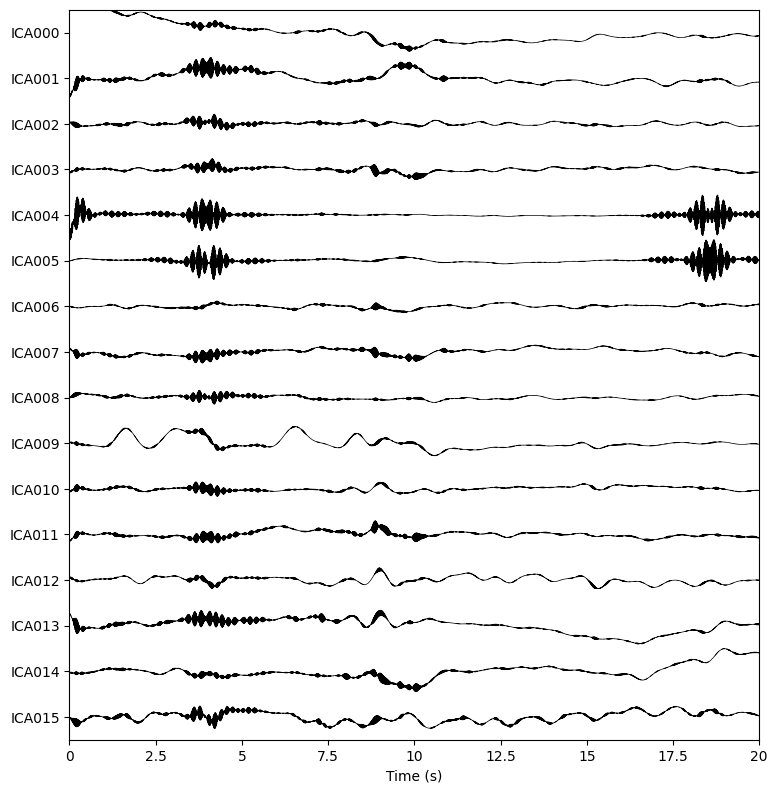


Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-10-f8534260675f>:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(mne_raw_filtered[i])


Fitting ICA took 4.1s.


<ipython-input-10-f8534260675f>:5: RuntimeWarning: Using n_components=16 (resulting in n_components_=16) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.8) and smallest (8.3e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(mne_raw_filtered[i])


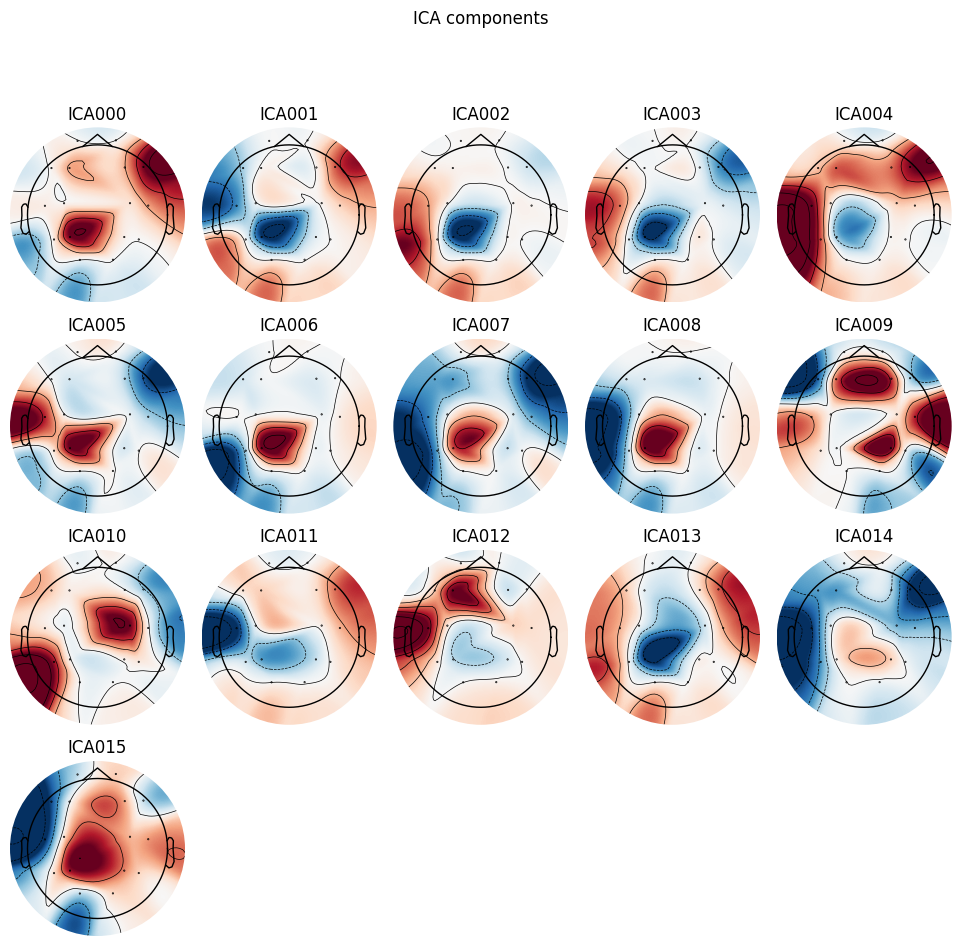

Creating RawArray with float64 data, n_channels=16, n_times=16742
    Range : 0 ... 16741 =      0.000 ...   133.928 secs
Ready.
Opening ica-browser...


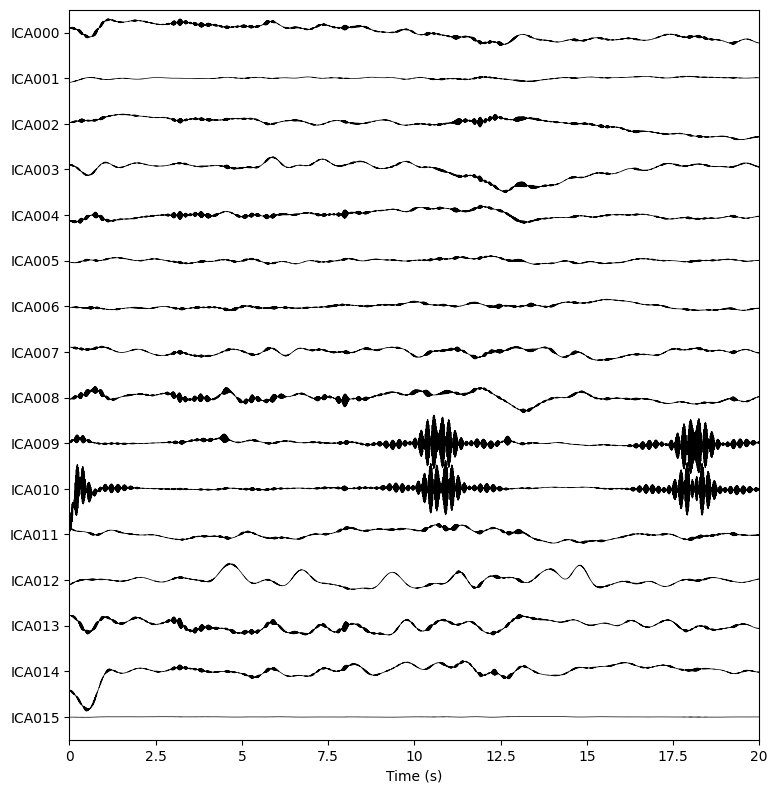

In [ ]:
##### ICA
if p_ica_flag == 1:
    for i in range(0,len(filenames)):
        ica = mne.preprocessing.ICA(n_components=n_channels, random_state=97, max_iter='auto')
        ica.fit(mne_raw_filtered[i])
        ica.plot_components(picks='eeg', ch_type='eeg', outlines='skirt')
        ica.plot_sources(mne_raw_filtered[i], show_scrollbars=False)
        print()

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-11-fd7b066eede2>:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(mne_raw_filtered[i])


Fitting ICA took 2.9s.
Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 10 ICA components
    Projecting back using 16 PCA components
Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-11-fd7b066eede2>:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(mne_raw_filtered[i])


Fitting ICA took 2.4s.
Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 10 ICA components
    Projecting back using 16 PCA components
Opening raw-browser...


<ipython-input-11-fd7b066eede2>:11: RuntimeWarning: Using n_components=16 (resulting in n_components_=16) may lead to an unstable mixing matrix estimation because the ratio between the largest (0.8) and smallest (8.3e-08) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(mne_raw_filtered[i])


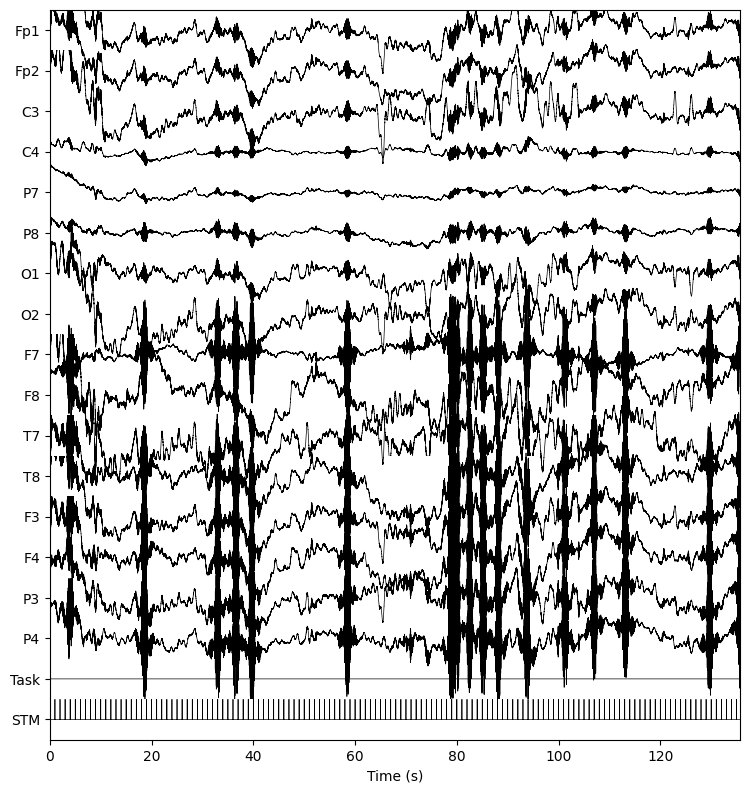

Effective window size : 16.384 (s)


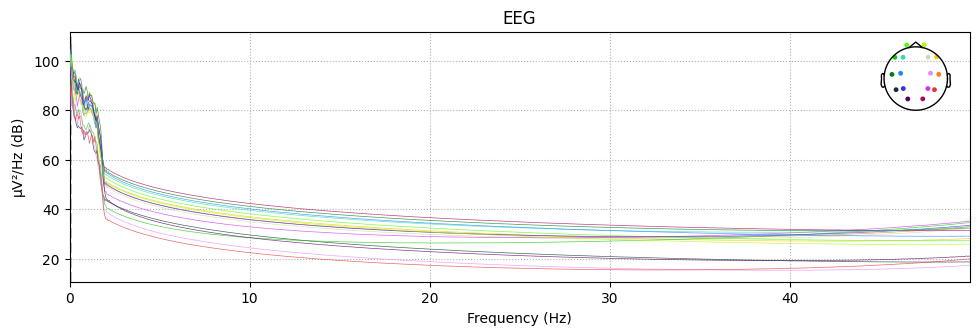

In [ ]:
if p_ica_flag == 1:
    mne_raw_filtered_ica={}

    # #[To-Do] : Automation
    ica_exclude = {}
    ica_exclude[0] = [3,4,6,7,8,10,11,12,13,15] # manually selected components
    ica_exclude[1] = [3,4,6,7,8,10,11,12,13,15] # manually selected components

    for i in range(0,len(filenames)):
        ica = mne.preprocessing.ICA(n_components=n_channels, random_state=97, max_iter='auto')
        ica.fit(mne_raw_filtered[i])    
        ica.exclude = ica_exclude[i]
        #ica.plot_properties(mne_raw_filtered[i], picks=ica.exclude)
        mne_raw_filtered_ica[i] = mne_raw_filtered[i].copy()
        ica.apply(mne_raw_filtered_ica[i])

    mne_raw_filtered_ica[0].plot(duration=10000,show_scrollbars=False, show_scalebars=False, scalings='auto')
    mne_raw_filtered_ica[0].plot_psd(fmax=50)
    print('')

In [ ]:
## PSD

#data_temp = mne_raw.copy()
data_temp = mne_raw_filtered.copy()
#data_temp = mne_raw_filtered_ica.copy()

psds_data = {}

insterest_band = ['Delta δ','Theta θ','Alpha α','Beta β','Gamma γ',
                      'δ/Others','θ/Others','α/Others','β/Others','γ/Others',
                      'θ/α','α/θ','β/α','β/θ','β/(α+θ)','(δ+θ)/α','α/δ','θ/β','(θ+δ)/(α+β)','α/β','δ/θ','(θ+α)/β']

for f_i in range(0,len(filenames)):
    psds, freqs = mne.time_frequency.psd_welch(data_temp[f_i], fmin=2, fmax=59, picks='eeg') # PSD
    psds = 10. * np.log10(psds)
    
    #psds = (psds - psds.min()) / (psds.max() - psds.min())
    psds = (psds - psds.mean()) / psds.std()
        
    psds_temp=np.zeros(len(insterest_band))
    psds_temp_collect=pd.DataFrame()
    
    for i in range(0, n_channels):
        psds_temp[0] = sum(psds[i][((freqs >=0) & (freqs <= 4))]) / sum(((freqs >=0) & (freqs <= 4))) # delta
        psds_temp[1] = sum(psds[i][((freqs >=4) & (freqs <= 8))]) / sum(((freqs >=4) & (freqs <= 8))) # theta
        psds_temp[2] = sum(psds[i][((freqs >=8) & (freqs <= 12))]) / sum((freqs >=8) & (freqs <= 12)) # alpha
        psds_temp[3] = sum(psds[i][((freqs >=12) & (freqs <= 30))]) / sum((freqs >=12) & (freqs <= 30)) # beta
        psds_temp[4] = sum(psds[i][((freqs >=30) & (freqs <= 45))]) / sum((freqs >=30) & (freqs <= 45)) # gamma
        psds_temp[5]  = psds_temp[0] / (psds_temp[1]+psds_temp[2]+psds_temp[3]+psds_temp[4])
        psds_temp[6]  = psds_temp[1] / (psds_temp[0]+psds_temp[2]+psds_temp[3]+psds_temp[4])
        psds_temp[7]  = psds_temp[2] / (psds_temp[0]+psds_temp[1]+psds_temp[3]+psds_temp[4])
        psds_temp[8]  = psds_temp[3] / (psds_temp[0]+psds_temp[1]+psds_temp[2]+psds_temp[4])
        psds_temp[9]  = psds_temp[4] / (psds_temp[0]+psds_temp[1]+psds_temp[2]+psds_temp[3])
        psds_temp[10] = psds_temp[1] / psds_temp[2]
        psds_temp[11] = psds_temp[2] / psds_temp[1]
        psds_temp[12] = psds_temp[3] / psds_temp[2]
        psds_temp[13] = psds_temp[3] / psds_temp[1]
        psds_temp[14] = psds_temp[3] / (psds_temp[2]+psds_temp[1])
        psds_temp[15] = (psds_temp[0]+psds_temp[1]) / psds_temp[2]
        psds_temp[16] = psds_temp[2] / psds_temp[0]
        psds_temp[17] = psds_temp[1] / psds_temp[3]
        psds_temp[18] = (psds_temp[1]+psds_temp[0]) / (psds_temp[2]+psds_temp[3])
        psds_temp[19] = psds_temp[2] / psds_temp[3]
        psds_temp[20] = psds_temp[0] / psds_temp[1]
        psds_temp[21]  = (psds_temp[1]+psds_temp[2]) / psds_temp[3]
        psds_temp_collect = pd.concat([psds_temp_collect,pd.DataFrame(psds_temp)],axis=1)

    psds_temp_collect = psds_temp_collect.transpose()
    psds_temp_collect.columns=insterest_band
    psds_temp_collect.index=ch_names
    
    psds_data[f_i] = psds_temp_collect
    
## State PSD ploting    
for b_i in range(0,len(insterest_band)):
    fig, ax = plt.subplots(nrows=1, ncols=len(filenames), figsize=(30, 30), sharex=True, sharey=True)
    for f_i in range(0,len(filenames)):
        im, cn=mne.viz.plot_topomap(psds_data[f_i][insterest_band[b_i]], mne_raw[f_i].info, axes=ax[f_i], extrapolate='head', names=ch_names, show_names=True, cmap='RdBu_r', show=False) #,vmin=-0.1, vmax=0.1,)
        axes=ax[f_i].set_title(insterest_band[b_i]+': S' + str(f_i), fontweight='bold')
    #clb = fig.colorbar(im, ax=ax[:], shrink=0.1)
    #clb = fig.colorbar(im, ax=[ax[:]], location='right', shrink=0.1)
    clb = fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.1)
    #filename=(f'{exp_name}_PSD_{b_i}')
    #plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    #plt.close()

Output hidden; open in https://colab.research.google.com to view.